# Exploratory Data Analysis for Data driven health facility allocation in Rwanda


### Import needed libraries

In [54]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon, Point, LineString

import contextily as ctx

### Importing health facility distribution data

In [55]:
facility_data = gpd.read_file('data/facilities_points_rw.geojson')

### Analyzing is the distribution of health facilities around Rwanda

In [56]:
print('\n>> Health facility distribution data: \n\n', facility_data.head())


>> Health facility distribution data: 

                     name name:en   amenity building healthcare  \
0             Bon Berger    None    clinic     None     clinic   
1                   None    None  pharmacy     None       None   
2                   None    None  hospital     None       None   
3             Polyclinic    None   dentist     None    dentist   
4  Maisha Optical Centre    None  hospital     None   hospital   

         healthcare:speciality operator:type capacity:persons addr:full  \
0                         None          None             None      None   
1                         None          None             None      None   
2                         None          None             None      None   
3                         None          None             None      None   
4  optometry;optician;eye_care       private             None      None   

  addr:city           source     name:fr name:rw name:sw       osm_id  \
0      None             None  Bon Ber

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_22364\3862073820.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


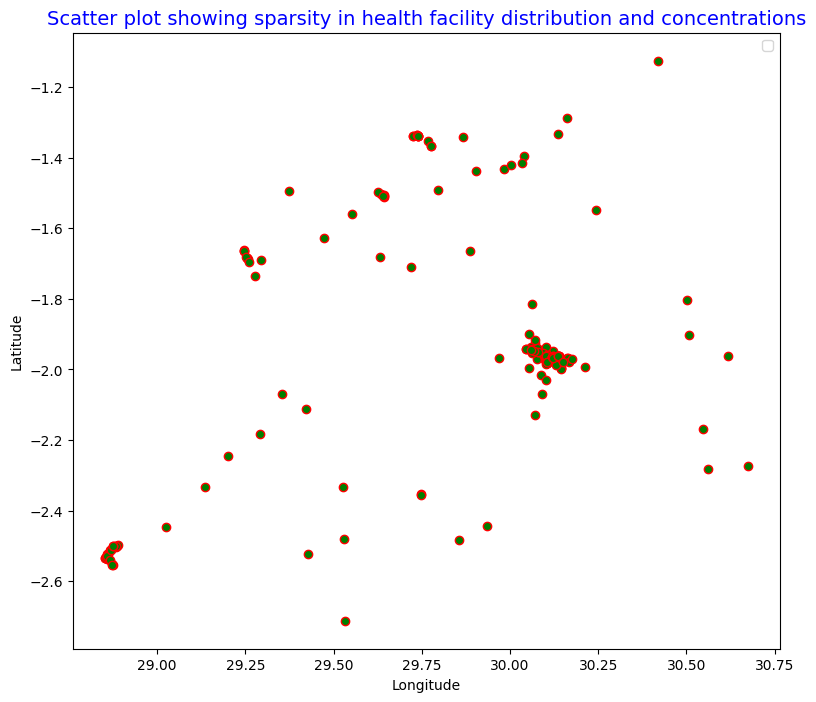

In [57]:
facility_gdf = gpd.GeoDataFrame(facility_data, geometry="geometry", crs="EPSG:4326") # Coordinate system used is EPSG:4326

# Plotting sparcity map
fig, ax = plt.subplots(figsize=(12, 8))
facility_gdf.plot(ax=ax, color="green", edgecolor="red")

ax.set_title("Scatter plot showing sparsity in health facility distribution and concentrations", color='b', fontsize=14)
ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)
plt.legend()
plt.show()


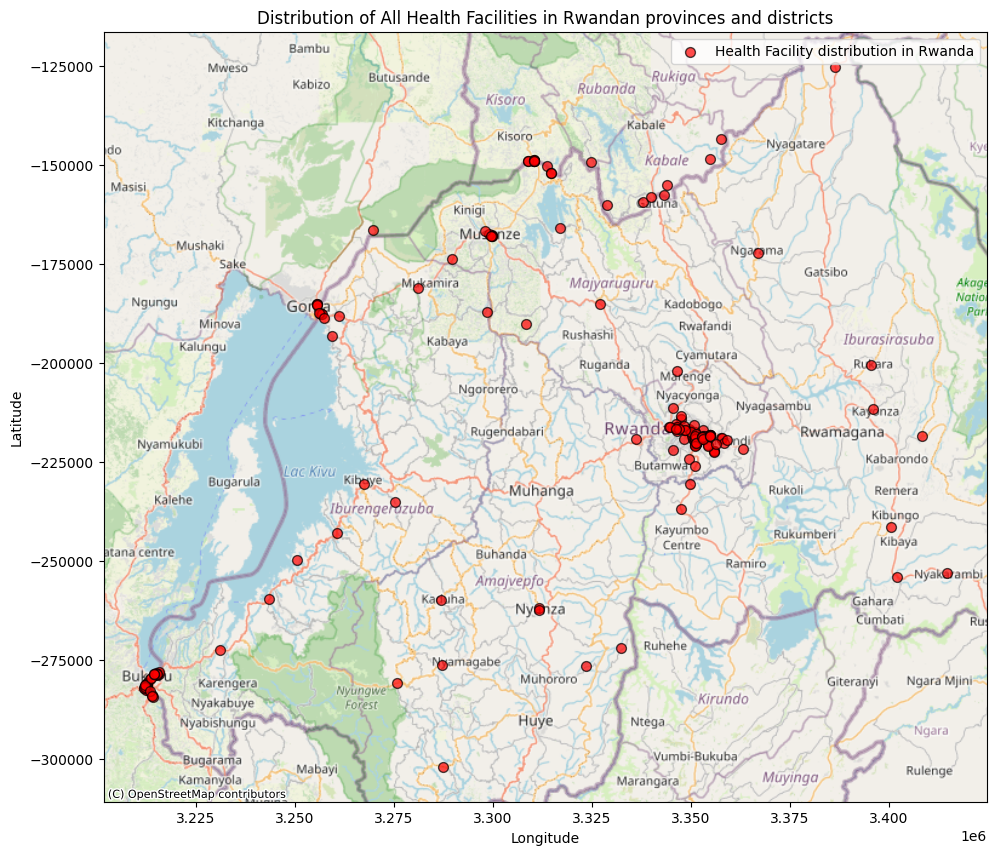

In [58]:
gdf = facility_gdf

# Ensuring the GeoDataFrame is in the right projection (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Creating the visualization map plot
fig, ax = plt.subplots(figsize=(14, 10))

# Plot of health facilities
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.7, edgecolor="black", label="Health Facility distribution in Rwanda")

# Adding a base map
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Distribution of All Health Facilities in Rwandan provinces and districts")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.show()


## Analyzing the spread of the various different types of health facility amenities

### Hospitals | Clinics | Pharmacies | Health Post 

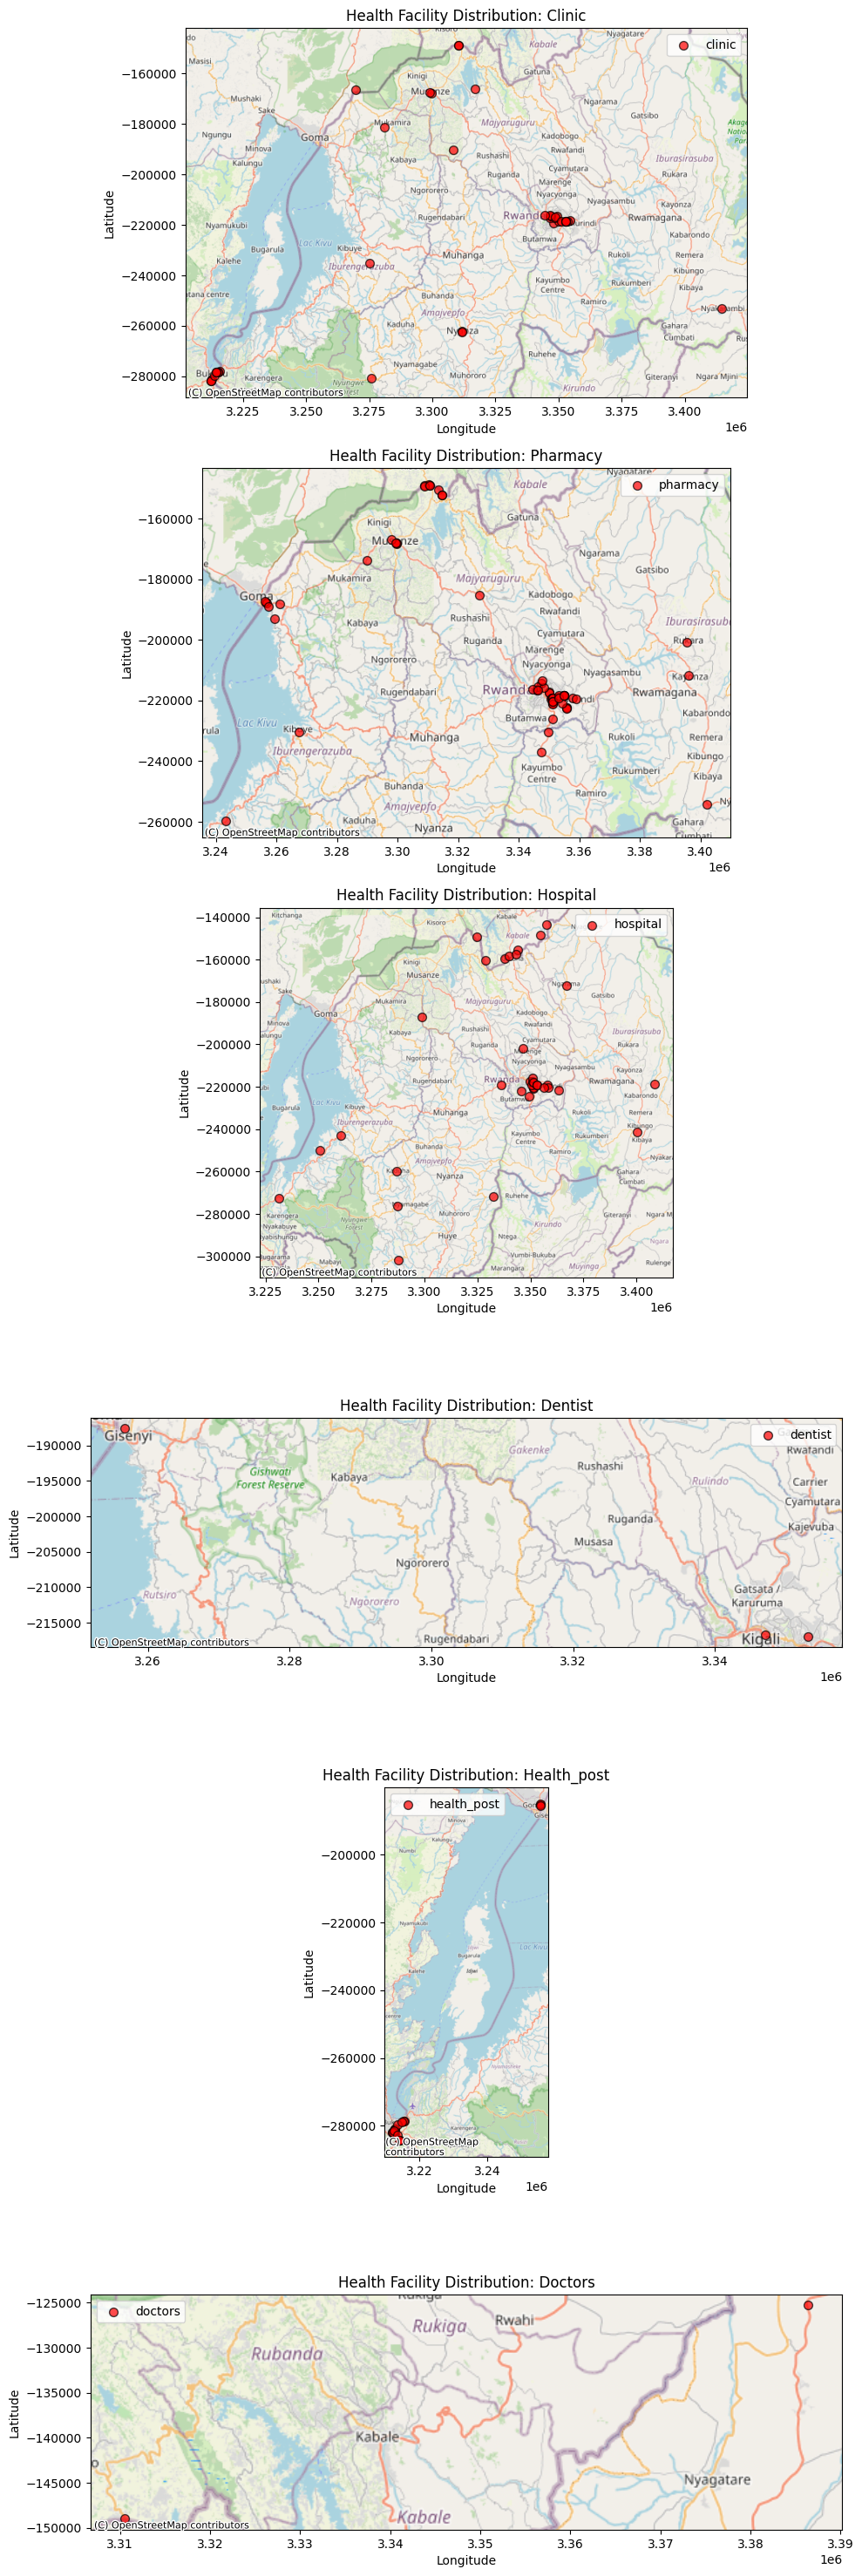

In [59]:

# Get unique amenity types
amenity_types = gdf['amenity'].dropna().unique()

# Create subplots for each amenity type
fig, axes = plt.subplots(nrows=len(amenity_types), figsize=(10, 5 * len(amenity_types)))

# If there's only one type, axes won't be an array, so make it iterable
if len(amenity_types) == 1:
    axes = [axes]

# Loop through each amenity type and plot separately
for ax, amenity in zip(axes, amenity_types):
    # Filter data for the specific amenity type
    gdf_subset = gdf[gdf['amenity'] == amenity]

    # Plot the filtered facilities
    gdf_subset.plot(ax=ax, color='red', markersize=50, alpha=0.7, edgecolor="black", label=amenity)

    # Add a base map
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

    # Titles and labels
    ax.set_title(f"Health Facility Distribution: {amenity.capitalize()}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# Load Rwanda district boundaries 
districts = gpd.read_file("data/rw_boundaries.shp") 

print(districts.geom_type.unique())  # 'Polygon' or 'MultiPolygon'
print(districts.columns)  # 'district_name' or similar

print(districts.geom_type.unique())  # 'Polygon' or 'MultiPolygon'


['Point']
Index(['geometry'], dtype='object')
['Point']


                    geometry
0   POINT (30.0768 -1.97009)
1    POINT (30.05815 -1.945)
2  POINT (29.52832 -2.48089)
3  POINT (30.12203 -1.94849)
4  POINT (30.09204 -1.95219)


KeyError: 'district_name'

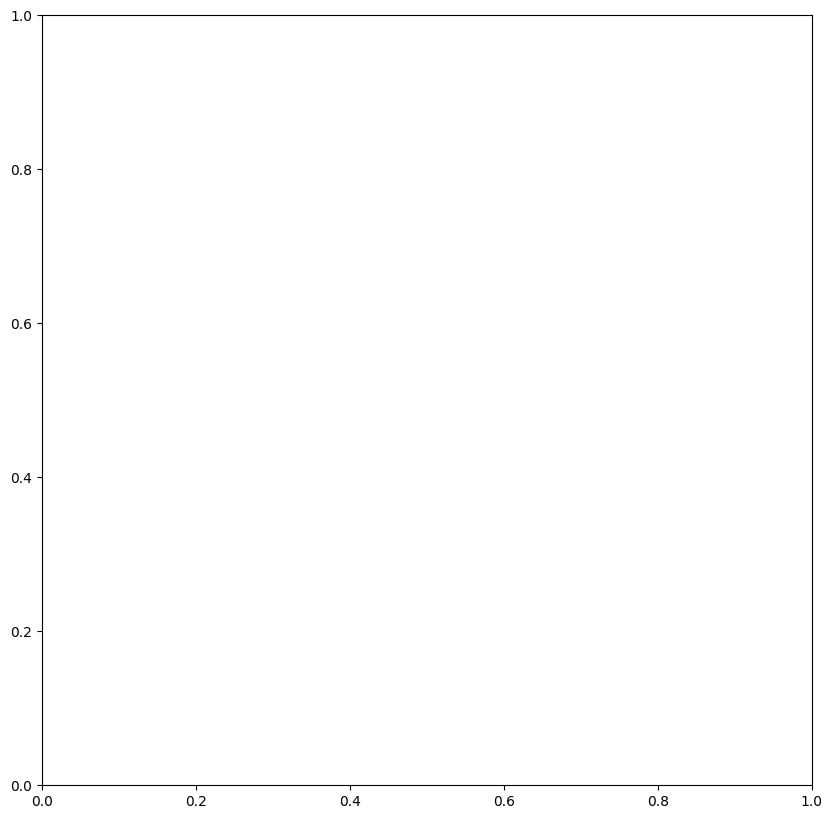

In [ ]:
districts = gpd.read_file("path_to_rwanda_districts.shp")

# Ensure CRS is correct
if districts.crs is None:
    districts = districts.set_crs(epsg=4326)  # Set to WGS84 if missing

districts = districts.to_crs(epsg=3857)  # Convert to Web Mercator for basemap

# Plot district boundaries with different colors and black borders
fig, ax = plt.subplots(figsize=(10, 10))
districts.plot(ax=ax, column="district_name", cmap="tab20", edgecolor="black", legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
ax.set_title("Rwanda Districts", fontsize=14)
ax.axis("off")  # Remove axis labels

plt.show()
